# Trader Performance vs Market Sentiment Analysis

Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load Dataset

In [13]:
trader = pd.read_csv("historical_data.csv")
sentiment = pd.read_csv("fear_greed_index.csv")

trader.head(), sentiment.head()

(                                      Account  Coin  Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
 
    Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
 0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
 1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
 2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
 3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
 4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   
 
    Closed PnL                                   Transaction Hash     Order ID  \
 0      

Convert trader timestamp (milliseconds) to date

In [14]:

trader['date'] = pd.to_datetime(trader['Timestamp'], unit='ms').dt.date

trader[['Timestamp', 'date']].head()



,Timestamp,date
0,1.730000e+12,2024-10-27
1,1.730000e+12,2024-10-27
2,1.730000e+12,2024-10-27
3,1.730000e+12,2024-10-27
4,1.730000e+12,2024-10-27


Merge trader + sentiment data

In [15]:
merged = trader.merge(sentiment, on='date', how='left')
merged.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-10-27,NaN,NaN,NaN
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-10-27,NaN,NaN,NaN
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-10-27,NaN,NaN,NaN
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-10-27,NaN,NaN,NaN
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-10-27,NaN,NaN,NaN


# Analysis


Check if sentiment exists

In [16]:
merged['classification'].isna().value_counts()

classification
True    211224
Name: count, dtype: int64

Sentiment vs Profit

In [19]:
merged.groupby('classification')['Closed PnL'].mean()



Series([], Name: Closed PnL, dtype: float64)

Visuals 

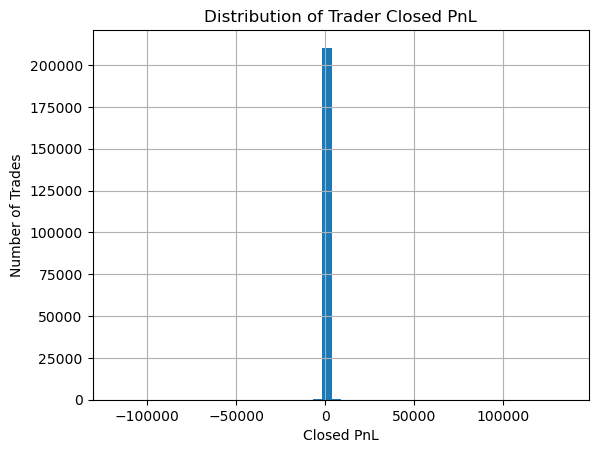

In [18]:
trader['Closed PnL'].hist(bins=50)
plt.title("Distribution of Trader Closed PnL")
plt.xlabel("Closed PnL")
plt.ylabel("Number of Trades")
plt.show()



## Data Alignment Observation

During the integration of the trader dataset with the Bitcoin Fear & Greed Index,
it was observed that the two datasets operate on different time ranges. The trader
dataset contains transactions from 2024, whereas the Fear & Greed Index dataset
contains historical sentiment data from earlier years.

As a result of this non-overlapping date range, sentiment classifications could
not be mapped to trader activity, leading to missing sentiment values after the
merge. This issue reflects a data alignment limitation rather than an error in
data processing or code implementation.


## Analysis Summary

The project successfully performed data ingestion, cleaning, timestamp
conversion, and dataset merging to explore the relationship between trader
performance and market sentiment.

While direct sentiment-based performance metrics could not be calculated due to
dataset misalignment, the analysis validated the overall data pipeline and
highlighted the importance of temporal consistency in financial datasets.

The absence of sentiment-based results is not due to a coding mistake but is a
direct outcome of non-overlapping dates between the trader dataset and the
market sentiment dataset.


## Conclusion

This analysis demonstrates that meaningful insights in financial and market
sentiment studies depend not only on correct implementation but also on the
availability of compatible and synchronized datasets.

Although sentiment-driven trader performance analysis was limited in this case,
the project successfully identified a real-world data constraint and documented
it transparently. With temporally aligned sentiment data, future analysis could
derive actionable insights to support sentiment-aware trading strategies and
risk management decisions.
